## 准备数据
* 学习曲线与人类的学习曲线相似，可以了解为随着数据特征的导入，模型获得的数据预测的能力。在之前我们学到PCA(主成分分析法)的降维作用，降维过程中我们可以通过PCA的方差解释度的来确定确定需要使用的特征数量。其实如果过程中能使用曲线来展示，是一个让其他人容易理解的方法，这是一个非常酷，装哔的方法。以下通过一个虚拟的数据来展示学习曲线：


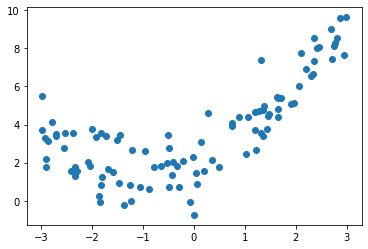

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(666)
x = np.random.uniform(-3.0 ,3.0, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0,1,100) #增加噪音

plt.scatter(X,y)
plt.show()

## 绘制学习曲线

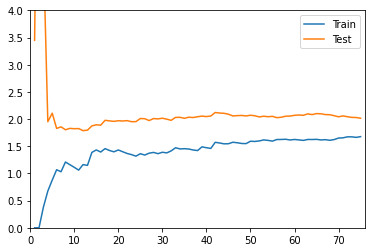

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def plot_learning_curve(algo,X_train,X_test,y_train,y_test):
    train_score = []
    test_score = []

    for i in range(1,len(X_train)+1):
        algo.fit(X_train[:i],y_train[:i])
        y_train_predict = algo.predict(X_train[:i])
        train_score.append(mean_squared_error(y_train[:i],y_train_predict )) 

        y_test_predict = algo.predict(X_test)
        test_score.append(mean_squared_error(y_test,y_test_predict))

    plt.plot([i for i in range(1,len(X_train)+1)], np.sqrt(train_score),label = 'Train')
    plt.plot([i for i in range(1,len(X_train)+1)], np.sqrt(test_score),label = 'Test')
    plt.legend()
    plt.axis([0,len(X_train)+1,0,4])
    plt.show()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10)
plot_learning_curve(LinearRegression(),X_train,X_test,y_train,y_test)

## 使用多项式回归拟合，并绘制学习曲线

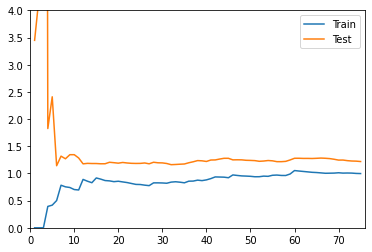

In [3]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

def PolynomialRegression(degree):
    return Pipeline([
        ("ploy",PolynomialFeatures(degree = degree)),
        ("std_scaler",StandardScaler()),
        ("lin_reg",LinearRegression())  
    ])
def PolynomialRegression(degree):
    return Pipeline([
        ("ploy",PolynomialFeatures(degree = degree)),
        ("std_scaler",StandardScaler()),
        ("lin_reg",LinearRegression())  
    ])

poly2_reg = PolynomialRegression( degree = 2)
plot_learning_curve(poly2_reg,X_train,X_test,y_train,y_test)

* 由此可看到之前的数据直接使用线性模型拟合的时候，RMSE在1.5左右，在使用degree=2多项式回归后RMSE在1.0左右,模型的效果更好。

* 直接使用linearRegression训练模型是欠拟合(underfitting),使用degreee=2做PolynomialRegression后的效果是刚刚好的。以下我们尝试将PolynomialRegression使用degree=20来绘制学习曲线：

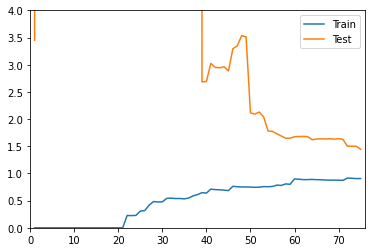

In [4]:
poly20_reg = PolynomialRegression( degree = 20)
plot_learning_curve(poly20_reg,X_train,X_test,y_train,y_test)

* 由此可以看到以上模式是过拟合(Overfitting)的

* 今天学习了一个很酷的展示模型的拟合情况的方法，同时以比较直观的方式了解了模型在欠拟合。